file_path = '../../bullet/checkpoints/foundation-200/log.txt'
lines = 38000
file_path = '../../bullet/checkpoints/serpent-200/log.txt'
lines = 38000
file_path = '../../bullet/checkpoints/broadside-200/log.txt'
lines = 38000


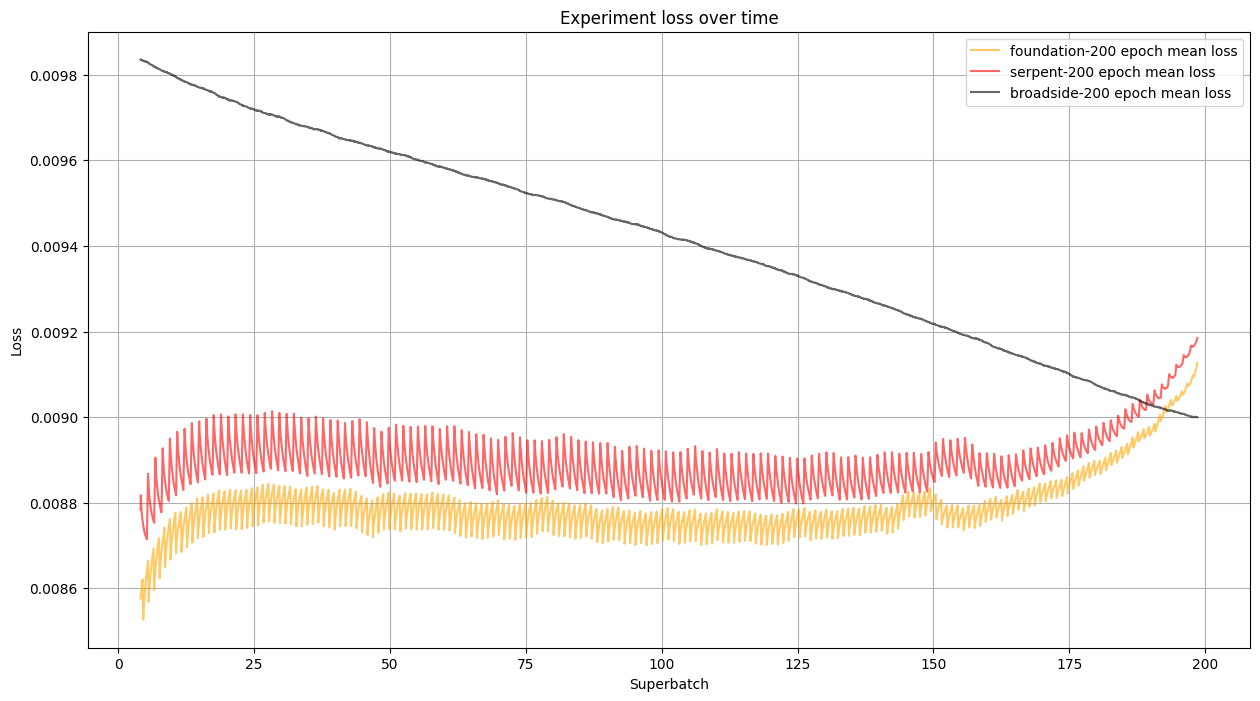

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Load the CSV file
whitelist = ["foundation", "broadside", "serpent"]
# whitelist = ["alembic"]
PATH = "../../bullet/checkpoints"

dfs = []
for file in os.listdir(PATH):
    if not any(name in file for name in whitelist):
        continue
    file_path = f"{PATH}/{file}/log.txt"
    print(f"{file_path = }")

    df = pd.read_csv(file_path, header=None, names=["superbatch", "batch", "loss"], dtype=str)

    print(f"lines = {len(df)}")

    # print(df.head())
    df["superbatch"] = df["superbatch"].str.removeprefix("superbatch:").astype(int)
    df["batch"] = df["batch"].str.removeprefix("batch:").astype(int)
    df["loss"] = df["loss"].str.removeprefix("loss:").astype(float)
    # print(df.head())

    # Group by epoch and calculate the average loss for each epoch
    df["total_batch"] = (df["superbatch"] - 1) * 6104 + df["batch"]
    df.drop(["superbatch", "batch"], axis=1, inplace=True)

    dfs.append((file, df))

# Plotting
plt.figure(figsize=(15, 8))

CONV = 551
HALF = (CONV - 1) // 2

colors = ["orange", "red", "black", "green", "blue", "pink"]
colors = (c for c in colors)

for file, df in dfs:
    plt.plot(
        df["total_batch"][500:][HALF:-HALF] / 6104,
        np.convolve(df["loss"][500:], np.ones(CONV) / CONV, "valid"),
        label=f"{file} epoch mean loss",
        alpha=0.6,
        color=next(colors)
    )

# Adding labels and title
plt.xlabel("Superbatch")
plt.ylabel('Loss')
plt.title('Experiment loss over time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()